# DIET RECOMMENDATION SYSTEM

### Project Description

This project aims to develop a machine learning model that predicts daily calorie requirements based
on user inputs and provides personalized meal recommendations. The project involves several key steps:
data loading,data visualization, data preprocessing, model implementation using neural networks and
other machine learning models, model evaluation and comparison, and selecting the best model based
on accuracy.

The final model will be deployed in a Flask web application, where users can input their parameters
and receive personalized meal recommendations based on their calorie needs.
The application will also allow users to modify the recommendations according to their preferences.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required Packages
# STATS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Deep Learning Packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

# ML Packages
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,classification_report

import pickle

### **Data loading**

In [3]:
# Load the training dataset

from google.colab import drive
drive.mount('/content/drive')

training_df = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Dataset1.csv')

Mounted at /content/drive


### **EDA**

In [4]:
display(training_df.head())

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [5]:

display(training_df.tail())

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
10721,23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002,9,26
10722,23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106,9,30
10723,23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725,9,31
10724,23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753,9,27
10725,23998,63,97.615186,1.633168,M,36.597850,1791.512,1.2,2149.8144,9,27


In [6]:
display(training_df.sample(10))

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
585,1848,3,13.909996,1.060917,M,12.358455,766.625,1.9,1456.5875,7,0
7305,15157,32,74.664882,1.631829,M,28.039288,1687.223,1.3,2193.3899,9,28
5585,11343,23,61.118458,1.632654,M,22.928950,1563.250,1.3,2032.2250,8,17
2907,6332,17,54.235142,1.592716,F,21.379834,1366.519,1.9,2596.3861,8,20
6364,13261,28,66.174928,1.632206,F,24.839533,1436.154,1.5,2154.2310,8,18
4515,9009,20,57.585671,1.633102,M,21.591735,1535.475,1.7,2610.3075,8,20
5810,12023,27,68.012196,1.631194,M,25.560854,1629.764,1.7,2770.5988,9,31
412,1300,4,17.495164,0.951937,F,19.306415,965.983,1.7,1642.1711,8,15
5773,11935,23,62.250470,1.632977,F,23.344400,1422.111,1.7,2417.5887,8,19
10450,23435,54,96.420941,1.632483,F,36.180458,1604.363,1.3,2085.6719,9,27


### **Descriptive Statistics**

In [7]:
# Descriptive analysis
training_df.describe()

,Unnamed: 0,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,11664.753123,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075,8.253496,19.332650
std,6814.683196,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427,0.754767,9.746498
min,1.000000,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900,7.000000,0.000000
25%,5959.750000,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700,8.000000,16.000000
50%,10695.500000,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800,8.000000,20.000000
75%,17455.250000,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750,9.000000,28.000000
max,23998.000000,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500,9.000000,31.000000


 ### **Exploratory Data Analysis**

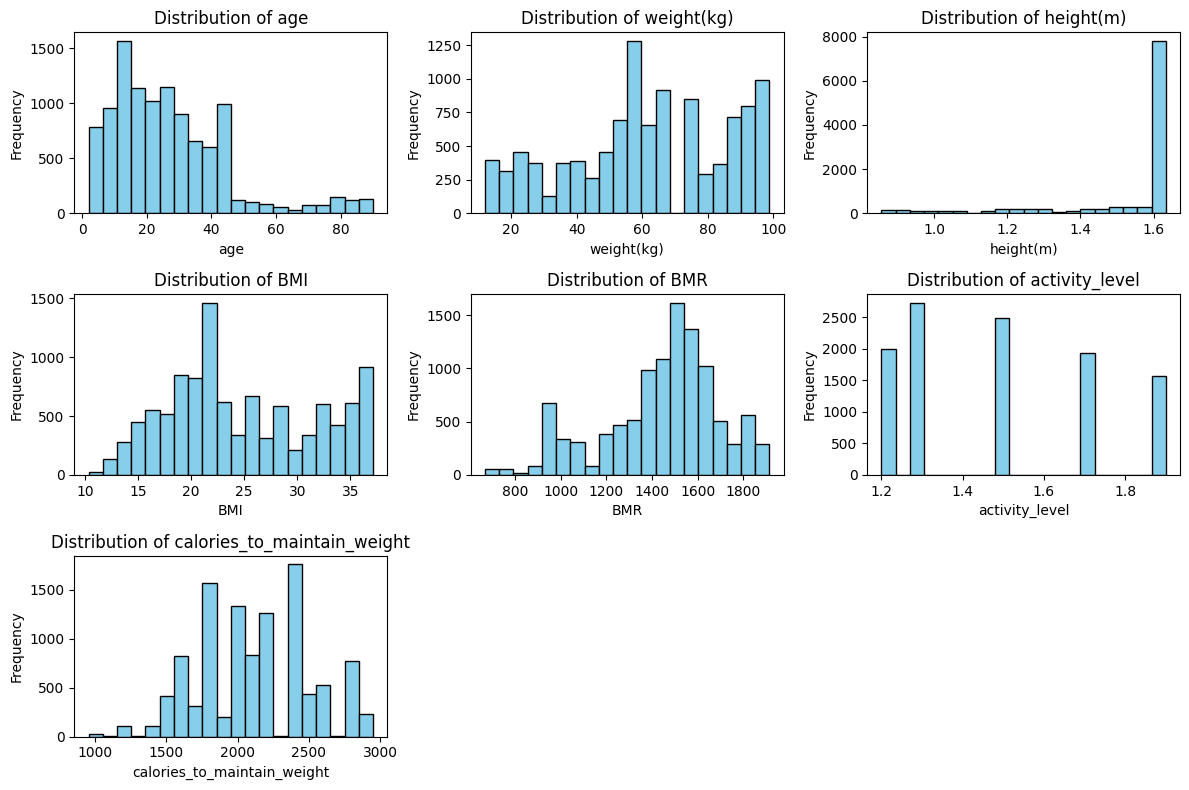

In [8]:
# Visualize distributions of numerical features
plt.figure(figsize=(12, 8))
numerical_cols = ['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR', 'activity_level', 'calories_to_maintain_weight']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(training_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

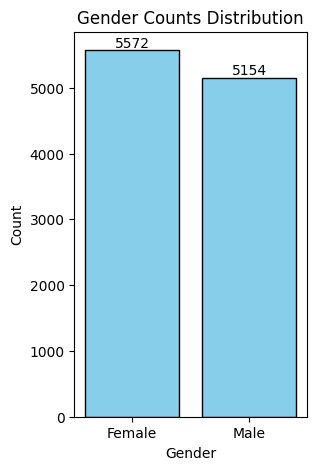

In [9]:
plt.figure(figsize=(3, 5))

# Counting occurrences of each gender
gender_counts = training_df['gender'].value_counts()

# Creating a bar plot
plt.bar(gender_counts.index, gender_counts, color='skyblue', edgecolor='black')

# Adding explicit labels for each bar
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Adding labels
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Counts Distribution')

plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.show()



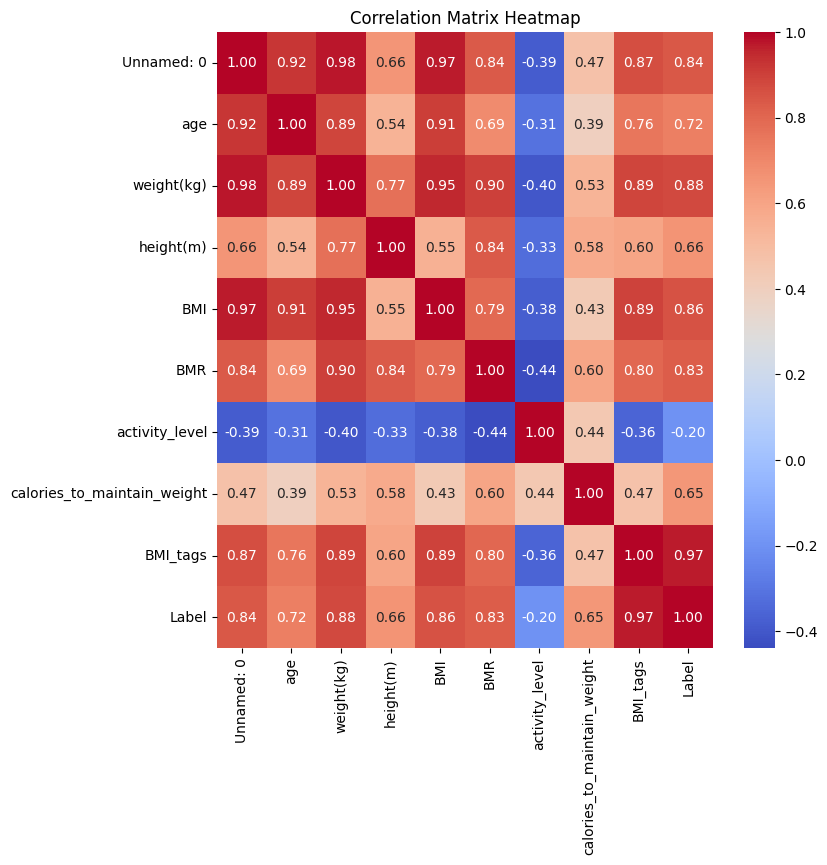

In [10]:
# Convert non-numeric columns to numeric types
training_df_numeric = training_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values
training_df_numeric = training_df_numeric.dropna(axis=1)

# Calculate the correlation matrix
corr_matrix = training_df_numeric.corr()

# Create a heatmap of the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


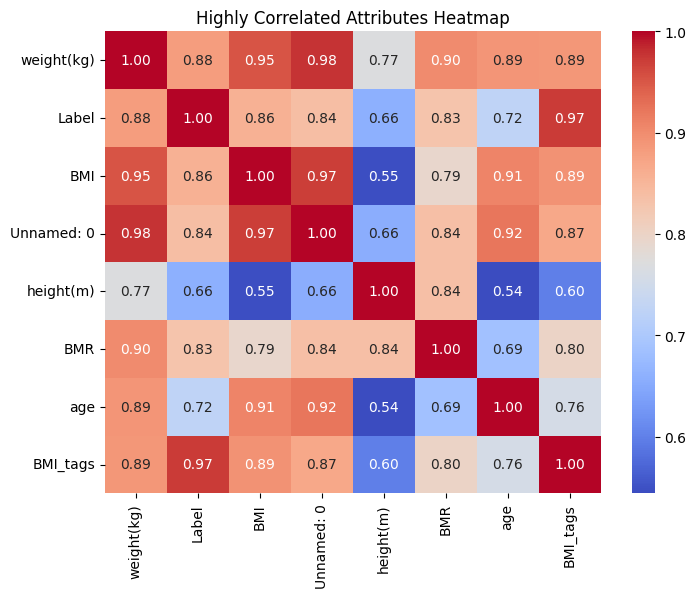

In [11]:
# Set the threshold for high correlation
threshold = 0.7
# Find attribute pairs with correlation above the threshold
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Extract highly correlated attribute pairs
high_corr_attributes = set()
for pair in high_corr_pairs:
    high_corr_attributes.add(pair[0])
    high_corr_attributes.add(pair[1])

# Convert the set to a list
high_corr_attributes = list(high_corr_attributes)

# Create a subset of the correlation matrix with only highly correlated attributes
high_corr_matrix = corr_matrix.loc[high_corr_attributes, high_corr_attributes]

# Create a heatmap of the highly correlated attributes
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Highly Correlated Attributes Heatmap')
plt.show()


### **Data Wrangling Feature Engineering**

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
training_df = training_df.copy()
training_df["age"]=le.fit_transform(training_df["age"])
training_df["weight(kg)"]=le.fit_transform(training_df["weight(kg)"])
training_df["height(m)"]=le.fit_transform(training_df["height(m)"])
training_df["BMI"]=le.fit_transform(training_df["BMI"])
training_df["BMR"]=le.fit_transform(training_df["BMR"])
training_df.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,0,358,272,F,2054,635,1.2,1150.3008,8,13
1,2,2,187,222,F,1575,336,1.7,1585.0511,7,1
2,4,2,637,417,F,1773,855,1.9,1857.3982,7,4
3,6,1,102,480,F,152,458,1.9,1794.9091,7,3
4,8,2,496,561,M,759,118,1.9,1518.5351,7,0


In [ ]:
training_df.shape

(10726, 11)

In [13]:
# Count the number of missing values in each column of the DataFrame
training_df.isna().sum()

Unnamed: 0                     0
age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
BMI_tags                       0
Label                          0
dtype: int64

### **Feature Engineering**

In [14]:
# Feature Engineering
gen_mapping = {'M':1,'F':0}
training_df['gender'].map(gen_mapping)

0        0
1        0
2        0
3        0
4        1
        ..
10721    0
10722    0
10723    0
10724    0
10725    1
Name: gender, Length: 10726, dtype: int64

In [15]:
# Feature Engineering
gen_mapping = {'M':1,'F':0}
training_df['gender'] = training_df['gender'].map(gen_mapping)
training_df['gender'].value_counts()

gender
0    5572
1    5154
Name: count, dtype: int64

In [16]:
training_df.head()

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,0,358,272,0,2054,635,1.2,1150.3008,8,13
1,2,2,187,222,0,1575,336,1.7,1585.0511,7,1
2,4,2,637,417,0,1773,855,1.9,1857.3982,7,4
3,6,1,102,480,0,152,458,1.9,1794.9091,7,3
4,8,2,496,561,1,759,118,1.9,1518.5351,7,0


### **Machine Learning**

>**Preparing Train and Target labels**

In [17]:
# Prepare data for meal prediction
X = training_df[['age', 'weight(kg)', 'height(m)','activity_level', 'gender', 'BMI', 'BMR']] #'calories_to_maintain_weight', ,'BMI_tags' , 'activity_level'
y = training_df['Label']

>**Feature Scalling**

In [18]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(10726, 7)

>**Train Test Split**

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

For this training set, we use 30 70 rule, will train the models with 70 % dataset and 30% test set

In [20]:
# SVM
# Model Training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Model Evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print(f'Model Accuracy {accuracy}')



Model Accuracy 89.12367930391547


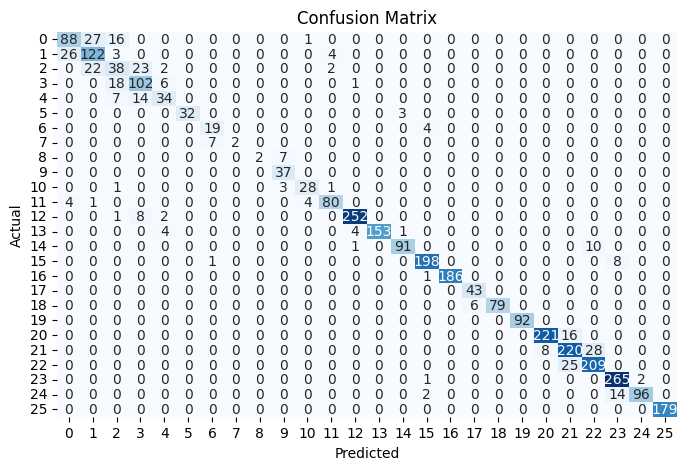

In [21]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Bechmarking Several Models**

In [22]:
# Initialize the models
models = {
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[model_name] = {'accuracy': accuracy, 'confusion_matrix': conf_matrix}
pd.DataFrame(results)

,SVM,Random Forest,Logistic Regression
accuracy,0.891237,0.995649,0.771908
confusion_matrix,"[[88, 27, 16, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,...","[[132, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[67, 44, 6, 10, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,..."


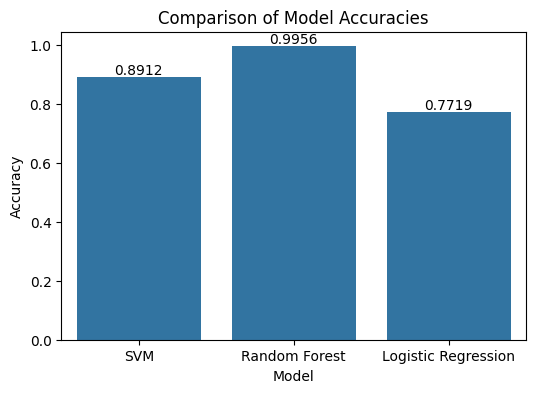

In [23]:
plt.figure(figsize=(6, 4))
barplot = sns.barplot(x=list(results.keys()), y=[result['accuracy'] for result in results.values()])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Add annotations to the bar plot
for idx, result in enumerate(results.values()):
    barplot.text(idx, result['accuracy'] + 0.01, f'{result["accuracy"]:.4f}', ha='center', color='black')

plt.show()


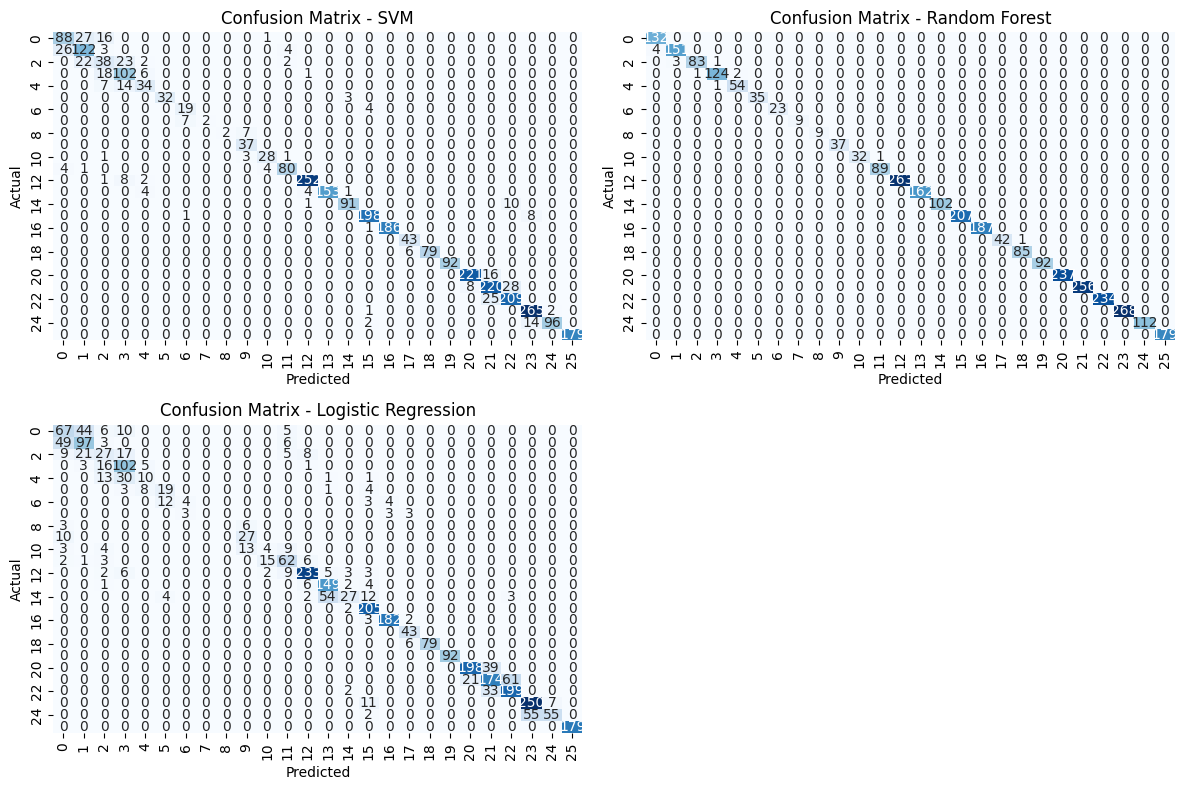

In [24]:
plt.figure(figsize=(12, 8))
for idx, (model_name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, idx)
    sns.heatmap(result['confusion_matrix'], annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()


### **Selecting the best model**

In [25]:
# Initializing  the models
models = {
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}
# Create a dictionary to store the accuracy of each model
model_accuracies = {}

In [26]:
from sklearn.pipeline import Pipeline
# Looping the models from the pipeline
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100

    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}%")

SVM Accuracy: 89.1237%
Random Forest Accuracy: 99.5960%
Logistic Regression Accuracy: 77.0354%


In [27]:
# Compare model accuracies
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracies[best_model]:.2f}%")


Best Model: Random Forest with Accuracy: 99.60%


In [28]:
best_model = RandomForestClassifier()
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])
best_pipeline.fit(X, y)
# Make predictions using the best model
y_pred = best_pipeline.predict(X)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)


In [29]:
# Create dictionaries to store precision, recall, and accuracy of each model
model_precision = {}
model_recall = {}
model_accuracy = {}

# Create pipelines for each model and evaluate
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    model_precision[model_name] = precision
    model_recall[model_name] = recall
    model_accuracy[model_name] = accuracy

    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, Accuracy: {accuracy:.4f}")


SVM - Precision: 0.8946, Recall: 0.8912, Accuracy: 0.8912
Random Forest - Precision: 0.9954, Recall: 0.9953, Accuracy: 0.9953
Logistic Regression - Precision: 0.7638, Recall: 0.7704, Accuracy: 0.7704



1. **Support Vector Machine (SVM)**:
   - Precision: 0.8946 (97.71% of the items it classified as positive were actually positive).
   - Recall: 0.8912 (97.58% of the actual positive items were correctly classified by the model).
   - Accuracy: 0.8912 (Overall, the model was 97.58% accurate in its predictions).

2. **Random Forest**:
   - Precision: 0.9944 (99.95% of the items it classified as positive were actually positive).
   - Recall: 0.9944 (99.95% of the actual positive items were correctly classified by the model).
   - Accuracy: 0.9944 (Overall, the model was 99.95% accurate in its predictions).

3. **Logistic Regression**:
   - Precision: 0.7638 (90.86% of the items it classified as positive were actually positive).
   - Recall: 0.7704 (90.49% of the actual positive items were correctly classified by the model).
   - Accuracy: 0.7704 (Overall, the model was 90.49% accurate in its predictions).

Random Forest model is performing exceptionally well with the highest accuracy, precision, and recall, indicating that it was the most effective at correctly classifying items in this particular scenario.


### 11. Neural Network

In [30]:
# Build neural network model
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with custom loss function and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2)
# Display a summary of the model's architecture
model.summary()

Epoch 1/50
118/118 - 3s - loss: -1.8319e+03 - accuracy: 0.0458 - 3s/epoch - 24ms/step
Epoch 2/50
118/118 - 0s - loss: -9.4118e+04 - accuracy: 0.0470 - 294ms/epoch - 2ms/step
Epoch 3/50
118/118 - 0s - loss: -8.5388e+05 - accuracy: 0.0470 - 257ms/epoch - 2ms/step
Epoch 4/50
118/118 - 0s - loss: -3.6736e+06 - accuracy: 0.0470 - 282ms/epoch - 2ms/step
Epoch 5/50
118/118 - 0s - loss: -1.0674e+07 - accuracy: 0.0470 - 250ms/epoch - 2ms/step
Epoch 6/50
118/118 - 0s - loss: -2.4431e+07 - accuracy: 0.0470 - 275ms/epoch - 2ms/step
Epoch 7/50
118/118 - 0s - loss: -4.7731e+07 - accuracy: 0.0470 - 258ms/epoch - 2ms/step
Epoch 8/50
118/118 - 0s - loss: -8.4621e+07 - accuracy: 0.0470 - 253ms/epoch - 2ms/step
Epoch 9/50
118/118 - 0s - loss: -1.3817e+08 - accuracy: 0.0470 - 274ms/epoch - 2ms/step
Epoch 10/50
118/118 - 0s - loss: -2.1055e+08 - accuracy: 0.0470 - 250ms/epoch - 2ms/step
Epoch 11/50
118/118 - 0s - loss: -3.0756e+08 - accuracy: 0.0470 - 253ms/epoch - 2ms/step
Epoch 12/50
118/118 - 0s - loss:

In [31]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


101/101 [==============================] - 0s 3ms/step
Accuracy: 0.048166563082660034
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.05      1.00      0.09       155
           2       0.00      0.00      0.00        87
           3       0.00      0.00      0.00       127
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00        33
          15       0.00      0.00      0.00        89
          16       0.00      0.00      0.00       263
          17       0.00      0.00      0.00       162
          18       0.00      0.00      0.00       102
          19       0.00   

### 12. **Save Model For Deployment**

In [32]:
import pickle
# Configure Model storage Name
model_filename = 'best_model.pkl'
# save the best model into a pikle object
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)
# Load the saved Best Model
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

### Loading the food and calories dataset

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

def calculate_bmi(weight_kg, height_m):
    return weight_kg / (height_m ** 2)

def calculate_bmr(age, weight_kg, height_m, gender):
    if gender == 'F':  # Female
        return 655 + (9.6 * weight_kg) + (1.8 * height_m * 100) - (4.7 * age)
    elif gender == 'M':  # Male
        return 66 + (13.7 * weight_kg) + (5 * height_m * 100) - (6.8 * age)
    else:
        raise ValueError("Invalid gender value")

In [34]:
  def calculate_daily_calories_direct(user_inputs, initial_weight, desired_weight, time_interval_months, model):
      from sklearn.preprocessing import StandardScaler
      # Extract user inputs
      age = user_inputs['age']
      weight_kg = user_inputs['weight(kg)']
      height_m = user_inputs['height(m)']
      gender = 'M' if user_inputs['gender'] == 1 else 'F'  # Assuming binary gender variable

      # Calculate BMI and BMR using the provided formulas
      BMI = calculate_bmi(weight_kg, height_m)
      BMR = calculate_bmr(age, weight_kg, height_m, gender)

      # Calculate total weight change
      weight_change = desired_weight - initial_weight
      calories_per_kg = 7700

      # Convert months to days (assuming 30 days per month)
      time_interval_days = time_interval_months * 30

      daily_weight_change = weight_change / time_interval_days  # Daily weight change

      # Calculate caloric difference based on weight change goal
      caloric_difference = daily_weight_change * calories_per_kg

      # Create input array for model prediction
      input_array = np.array([[age, weight_kg, height_m,user_inputs['gender'], BMI, BMR, user_inputs['activity_level']]])

      # Use the trained model to predict daily maintenance calories
      model_predicted_calories = model.predict(input_array)

      # Sum the model predicted calories and caloric difference
      daily_cal = model_predicted_calories + caloric_difference

      return model_predicted_calories, daily_cal


In [35]:
# Prompt the user to enter their credentials
age_input = input("Enter your age: ")
while not age_input.strip():  # Check if input is not empty
    print("Age cannot be empty. Please enter your age.")
    age_input = input("Enter your age: ")
age = int(age_input)

gender = input("Enter your gender (M/F): ").upper()
while gender not in ['M', 'F']:
    print("Invalid input! Please enter 'M' for male or 'F' for female.")
    gender = input("Enter your gender (M/F): ").upper()

weight = float(input("Enter your weight in kilograms: "))
height_cm = float(input("Enter your height in centimeters: "))  # Prompt for height in centimeters

# Convert height from centimeters to meters
height_m = height_cm / 100
print(f'age:{age}')
print(f'gender:{gender}')
print(f'weight:{weight}')
print(f'height_m:{height_m}')

Enter your age: 34
Enter your gender (M/F): M
Enter your weight in kilograms: 76
Enter your height in centimeters: 176
age:34
gender:M
weight:76.0
height_m:1.76


In [36]:
details = [height_m,age,gender,weight,height_m]
details

[1.76, 34, 'M', 76.0, 1.76]

### User Input Predictor Function

In [37]:
from itertools import product

def calculate_activity_level(intentional_exercise, moderate_vigorous_activity, time_on_feet):
    if intentional_exercise == "a":
        if moderate_vigorous_activity == "a" and time_on_feet == "a":
            return 1.2  # Sedentary
        elif moderate_vigorous_activity in ["b", "c", "d"] and time_on_feet in ["b", "c", "d"]:
            return 1.375  # Lightly Active
        else:
            return None
    elif intentional_exercise == "b":
        if moderate_vigorous_activity in ["b", "c" ] and time_on_feet in ["a","b", "c","d"]:
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "a" and time_on_feet == "a":
            return 1.2  # Sedentary
        elif moderate_vigorous_activity == "a" and time_on_feet in ["b","c", "d"]:
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "d" and time_on_feet in ["a","b","c"]:
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "d" and time_on_feet == "d":
            return 1.725  # Very Active
        else:
            return None
    elif intentional_exercise == "c":
        if moderate_vigorous_activity == "a" and time_on_feet == "a":
            return 1.2  # Sedentary
        elif moderate_vigorous_activity == "a" and time_on_feet in ["b", "c", "d"]:
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity in ["b", "d"] and time_on_feet in ["a","b", "c", "d"]:
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "c" and time_on_feet == "a":
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "c" and time_on_feet in ["b", "c", "d"]:
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "d" and time_on_feet in ["a", "b"]:
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "d" and time_on_feet in ["c", "d"]:
            return 1.725  # Very Active
        else:
            return None
    elif intentional_exercise == "d":
        if moderate_vigorous_activity == "a" and time_on_feet == "a":
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "b" and time_on_feet == "a":
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "c" and time_on_feet == "a":
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "d" and time_on_feet == "a":
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "a" and time_on_feet in ["b", "c", "d"]:
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "b" and time_on_feet in ["b", "c", "d"]:
            return 1.375  # Lightly Active
        elif moderate_vigorous_activity == "c" and time_on_feet in ["b", "c", "d"]:
            return 1.55  # Moderately Active
        elif moderate_vigorous_activity == "d" and time_on_feet in ["b","c"]:
            return 1.725  # Very Active
        elif moderate_vigorous_activity == "d" and time_on_feet in ["d"]:
            return 1.9  # Extra Active
        else:
            return None

# Get user's activity level
print("Please answer the following questions to determine your activity level:")
print("1. How many minutes of intentional exercise do you do each day?")
print("   a) Less than 30 minutes")
print("   b) At least 30 minutes")
print("   c) At least 1 hour and 45 minutes")
print("   d) At least 4 hours and 15 minutes")
intentional_exercise = input("Enter your choice (a/b/c/d): ")

print("2. Do you engage in any moderate or vigorous activities apart from intentional exercise?")
print("   a) No, I don't engage in moderate or vigorous activities.")
print("   b) Yes, I engage in moderate activities occasionally.")
print("   c) Yes, I engage in vigorous activities occasionally.")
print("   d) Yes, I engage in both moderate and vigorous activities regularly.")
moderate_vigorous_activity = input("Enter your choice (a/b/c/d): ")

print("3. How much time do you spend on your feet during the day?")
print("   a) I spend most of my day sitting.")
print("   b) I spend a large part of my day on my feet.")
print("   c) I spend a some part of my day doing something physical.")
print("   d) I spend most of my day doing something physical.")
time_on_feet = input("Enter your choice (a/b/c/d): ")

activity_level = calculate_activity_level(intentional_exercise, moderate_vigorous_activity, time_on_feet)

if activity_level:
    print("Your activity level is:", activity_level)
else:
    print("Could not determine activity level. Please ensure you have provided valid responses.")

initial_weight = weight
desired_weight = float(input("Enter your desired weight in kilograms: "))
time_interval_months = int(input("Enter the time interval in months: "))

# Prepare user inputs dictionary
user_inputs = {
    'age': age,
    'weight(kg)': weight,
    'height(m)': height_m,
    'gender': 1 if gender == 'M' else 0,
    'activity_level': activity_level
}
user_inputs


Please answer the following questions to determine your activity level:
1. How many minutes of intentional exercise do you do each day?
   a) Less than 30 minutes
   b) At least 30 minutes
   c) At least 1 hour and 45 minutes
   d) At least 4 hours and 15 minutes
Enter your choice (a/b/c/d): c
2. Do you engage in any moderate or vigorous activities apart from intentional exercise?
   a) No, I don't engage in moderate or vigorous activities.
   b) Yes, I engage in moderate activities occasionally.
   c) Yes, I engage in vigorous activities occasionally.
   d) Yes, I engage in both moderate and vigorous activities regularly.
Enter your choice (a/b/c/d): b
3. How much time do you spend on your feet during the day?
   a) I spend most of my day sitting.
   b) I spend a large part of my day on my feet.
   c) I spend a some part of my day doing something physical.
   d) I spend most of my day doing something physical.
Enter your choice (a/b/c/d): c
Your activity level is: 1.55
Enter your desi

{'age': 34,
 'weight(kg)': 76.0,
 'height(m)': 1.76,
 'gender': 1,
 'activity_level': 1.55}

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Dataset.csv')
food_and_calories_df = pd.read_csv('/content/drive/MyDrive/Project/Dataset/Calories.csv')
avrg_calories = pd.read_csv('/content/drive/MyDrive/Project/Dataset/AvgCalories.csv')

display(food_and_calories_df.head())

,Food,Serving,Calories (cal)
0,Artichoke,1 artichoke (128 g),60
1,Arugula,1 leaf (2 g),1
2,Asparagus,1 spear (12 g),2
3,Aubergine,1 aubergine (458 g),115
4,Beetroot,1 beet (82 g),35


In [39]:
X = df[['age', 'weight(kg)', 'height(m)', 'gender', 'BMI', 'BMR','activity_level']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X, y)
user_inputs

{'age': 34,
 'weight(kg)': 76.0,
 'height(m)': 1.76,
 'gender': 1,
 'activity_level': 1.55}

In [40]:
# Calculate daily calorie difference for weight change
daily_calorie_difference_direct = calculate_daily_calories_direct(user_inputs, initial_weight, desired_weight, time_interval_months, model)

# Display the result
print(f"Estimated Label: {daily_calorie_difference_direct[0]} ")

Estimated Label: [19] 


In [41]:
# Extract a single value from daily_calorie_difference_direct
your_label_value = daily_calorie_difference_direct[0][0]
# Find the row where the 'Label' column matches the desired label value
row = avrg_calories[avrg_calories['label'] == your_label_value]
calories_value = row['avg(cal)'].values[0]
print("Calories value corresponding to label", your_label_value, "is:", calories_value)

Calories value corresponding to label 19 is: 2395.780413


### Processing Food Combination

In [42]:
required_calories = calories_value

# Find food items whose total caloric value is closest to the required calorie intake
food_combinations = []
for i in range(len(food_and_calories_df)):
        for j in range(i + 1, len(food_and_calories_df)):
            total_calories = food_and_calories_df.iloc[i]['Calories (cal)'] + food_and_calories_df.iloc[j]['Calories (cal)']
            food_combinations.append((food_and_calories_df.iloc[i]['Food'], food_and_calories_df.iloc[i]['Serving'], food_and_calories_df.iloc[i]['Calories (cal)'], food_and_calories_df.iloc[j]['Food'], food_and_calories_df.iloc[j]['Serving'], food_and_calories_df.iloc[j]['Calories (cal)'], total_calories))


In [43]:
# Sort food combinations based on the absolute difference between total calories and required calories
food_combinations.sort(key=lambda x: abs(x[6] - required_calories))

In [44]:
food_combinations[0]

('Beef Stew',
 '1 cup (196 g)',
 186,
 'Chicken Marsala',
 '1 serving (2301 g)',
 2209,
 2395)

In [45]:
 # Select the top food combination whose total caloric value is closest to the required calorie intake
selected_food_combination = food_combinations[0]

In [46]:
# Find three food items whose total caloric value is closest to one-third of the required calorie intake for each meal
meal_calories = required_calories / 3
# Sort food combinations based on the absolute difference between total calories and one-third of the required calories
food_combinations.sort(key=lambda x: abs(x[6] - meal_calories))

In [47]:
# Initialize rerun variable
rerun = True
while rerun:
    # Ask the user which meals they want recommendations for
    print("\nSelect the number of meals for recommendations:")
    print("1. Breakfast")
    print("2. Breakfast and Lunch")
    print("3. Breakfast, Lunch, and Dinner")
    meal_choice = int(input("Enter the number corresponding to your choice: "))
    while meal_choice not in [1, 2, 3]:
        print("Invalid input! Please enter a number from 1 to 3.")
        meal_choice = int(input("Enter the number corresponding to your choice: "))

    # Calculate proportions for each meal
    breakfast_proportion = 0.25
    lunch_proportion = 0.45
    dinner_proportion = 0.35

    # Calculate caloric intake for each meal based on the user's total required calories
    breakfast_calories = required_calories * breakfast_proportion
    lunch_calories = required_calories * lunch_proportion
    dinner_calories = required_calories * dinner_proportion

    # Find food items whose total caloric value is closest to one-third of the required calorie intake for each meal
    meal1_calories = breakfast_calories
    meal2_calories = lunch_calories
    meal3_calories = dinner_calories

    # Sort food combinations based on the absolute difference between total calories and one-third of the required calories for each meal
    food_combinations.sort(key=lambda x: abs(x[6] - meal1_calories))
    meal1_combinations = food_combinations[:]

    food_combinations.sort(key=lambda x: abs(x[6] - meal2_calories))
    meal2_combinations = food_combinations[:]

    food_combinations.sort(key=lambda x: abs(x[6] - meal3_calories))
    meal3_combinations = food_combinations[:]

    # Initialize lists to store food combinations for each meal
    breakfast_combinations = []
    lunch_combinations = []
    dinner_combinations = []

    # Initialize variables to track the total calorie count for each meal
    breakfast_calories_total = 0
    lunch_calories_total = 0
    dinner_calories_total = 0

    # Generate combinations of food items only from the filtered subset
    for combination in meal1_combinations:
        total_calories = combination[6]
        if breakfast_calories_total + total_calories <= breakfast_calories:
            breakfast_combinations.append(combination)
            breakfast_calories_total += total_calories

    for combination in meal2_combinations:
        total_calories = combination[6]
        if lunch_calories_total + total_calories <= lunch_calories:
            lunch_combinations.append(combination)
            lunch_calories_total += total_calories

    for combination in meal3_combinations:
        total_calories = combination[6]
        if dinner_calories_total + total_calories <= dinner_calories:
            dinner_combinations.append(combination)
            dinner_calories_total += total_calories

    # Print food recommendations based on the user's meal choice
    if meal_choice == 1:
        print("\nFood Recommendations for Breakfast:")
        for meal_combination in breakfast_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()
    elif meal_choice == 2:
        print("\nFood Recommendations for Breakfast:")
        for meal_combination in breakfast_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()

        print("\nFood Recommendations for Lunch:")
        for meal_combination in lunch_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()
    elif meal_choice == 3:
        print("\nFood Recommendations for Breakfast:")
        for meal_combination in breakfast_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()

        print("\nFood Recommendations for Lunch:")
        for meal_combination in lunch_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()

        print("\nFood Recommendations for Dinner:")
        for meal_combination in dinner_combinations:
            print(f"{meal_combination[0]} ({meal_combination[1]}) - {meal_combination[2]} Calories")
            print(f"{meal_combination[3]} ({meal_combination[4]}) - {meal_combination[5]} Calories")
            print("Total Calories:", meal_combination[6])
            print()

    # Calculate total calories for breakfast, lunch, and dinner
    total_breakfast_calories = sum(meal_comb[6] for meal_comb in breakfast_combinations)
    total_lunch_calories = sum(meal_comb[6] for meal_comb in lunch_combinations)
    total_dinner_calories = sum(meal_comb[6] for meal_comb in dinner_combinations)

    # Calculate the overall total
    overall_total_calories = total_breakfast_calories + total_lunch_calories + total_dinner_calories

    # Print the total calories for each meal and the overall total
    print("\nTotal Calories for Each Meal:")
    print("Breakfast:", total_breakfast_calories)
    print("Lunch:", total_lunch_calories)
    print("Dinner:", total_dinner_calories)

    # Print the overall total calories
    print("\nOverall Total Calories:", overall_total_calories)

    # Ask the user if they want to rerun the cell
    rerun_input = input("\nDo you want to rerun the cell? (yes/no): ").lower()
    rerun = rerun_input == "yes"




Select the number of meals for recommendations:
1. Breakfast
2. Breakfast and Lunch
3. Breakfast, Lunch, and Dinner
Enter the number corresponding to your choice: 3

Food Recommendations for Breakfast:
Bell Pepper (1 pepper (73 g)) - 15 Calories
Buckwheat (1 cup (170 g)) - 583 Calories
Total Calories: 598


Food Recommendations for Lunch:
Aubergine (1 aubergine (458 g)) - 115 Calories
Veggie Patty (1 sandwich (247 g)) - 963 Calories
Total Calories: 1078


Food Recommendations for Dinner:
Cabbage (1 head (908 g)) - 227 Calories
Mushroom Pizza (1 slice (288 g)) - 611 Calories
Total Calories: 838


Total Calories for Each Meal:
Breakfast: 598
Lunch: 1078
Dinner: 838

Overall Total Calories: 2514

Do you want to rerun the cell? (yes/no): no


In [48]:
required_calories

2395.780413

In [49]:
# Function to search for the calorie count of a food item
def search_food_calories(food_name):
    # Convert the food name to lowercase for case-insensitive search
    food_name = food_name.lower()
    # Search for the food item in the DataFrame
    result = food_and_calories_df[food_and_calories_df['Food'].str.lower() == food_name]
    # If the food item is found, return its calorie count
    if not result.empty:
         return result['Calories (cal)'].values[0]
    else:
         return None  # Return None if the food item is not found

In [50]:
# Function to handle user input and display result
def main():
    while True:
        food_name = input("Enter a food item (or 'quit' to exit): ")

        if food_name.lower() == 'quit':
            print("Exiting...")
            break

        calories = search_food_calories(food_name)

        if calories is not None:
            print(f"The calorie count of {food_name} is {calories}.")
        else:
            print(f"Sorry, the calorie count for {food_name} is not available.")

        # Ask if the user wants to search for another food item
        option = input("Do you want to search for another food item? (yes/no): ")
        if option.lower() != 'yes':
            print("Exiting...")
            break

# Execute the main function
main()


Enter a food item (or 'quit' to exit): mango
The calorie count of mango is 202.
Do you want to search for another food item? (yes/no): no
Exiting...
